In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OYoloneatV0/'
TrainModelName = 'S54bin2.npz'
ValidationModelName = 'S54bin2Val.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'ORnetbin2d29V0.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters





In [3]:
#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 32
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-4
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = True
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 5

In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = nboxes, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='ORnetbin2d29V0.h5', batch_size=100, box_vector=4, categories=4, depth=29, epochs=250, gridX=1, gridY=1, learning_rate=0.0001, mid_kernel=3, multievent=False, nboxes=5, residual=True, start_kernel=3, startfilter=32)


number of  images:	 36076
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1899
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
loading weights
(36076, 1, 1, 24) 5














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36076 samples, validate on 1899 samples
Epoch 1/250
36076/36076 [==============================] - 54s 2ms/step - loss: 1.8302 - acc: 0.8476 - val_loss: 1.9641 - val_acc: 0.8562

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.9641121037700666, 'val_acc': 0.8562401317495494, 'loss': 1.8302336336570035, 'acc': 0.8476272304751469, 'lr': 1e-04}


<Figure size 432x288 with 0 Axes>

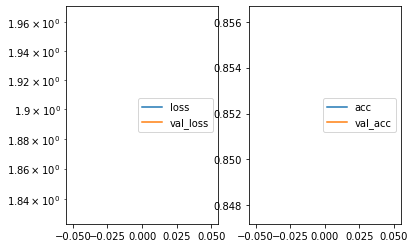

Predicted cell: MacroCheate Probability: [[0.99501234]]
True Cell type: MacroCheate
X [[0.404499]]
True positional value X 0.5
Y [[0.21784773]]
True positional value Y 0.3148148148148148
H [[0.3590297]]
True positional value H 0.46296296296296297
W [[0.2816398]]
True positional value W 0.3888888888888889


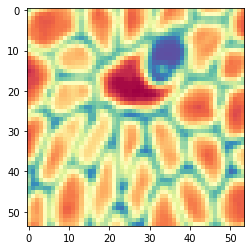

Epoch 2/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.7234 - acc: 0.8883 - val_loss: 1.8739 - val_acc: 0.8936

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.8739135332519345, 'val_acc': 0.8936282295876895, 'loss': 1.7233590289433234, 'acc': 0.8882913848343703, 'lr': 1e-04}


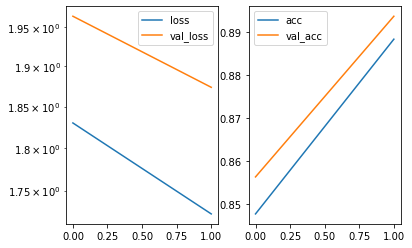

Predicted cell: Normal Probability: [[0.99625224]]
True Cell type: Normal
X [[0.3585549]]
True positional value X 0.5
Y [[0.37860578]]
True positional value Y 0.5
H [[0.3563687]]
True positional value H 0.6481481481481481
W [[0.31038317]]
True positional value W 0.46296296296296297


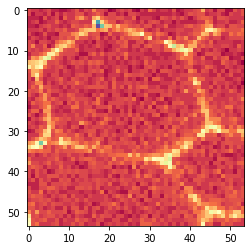

Epoch 3/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.6425 - acc: 0.9134 - val_loss: 1.8150 - val_acc: 0.9179

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.815008477577101, 'val_acc': 0.9178515007271146, 'loss': 1.6424614258993622, 'acc': 0.9133773152785127, 'lr': 1e-04}


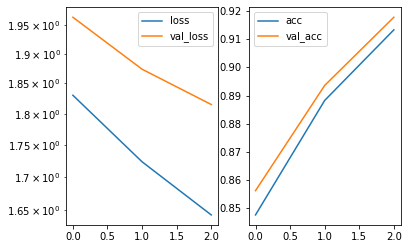

Predicted cell: MacroCheate Probability: [[0.9993113]]
True Cell type: MacroCheate
X [[0.243889]]
True positional value X 0.3148148148148148
Y [[0.4342301]]
True positional value Y 0.6851851851851852
H [[0.37297517]]
True positional value H 0.35185185185185186
W [[0.47953382]]
True positional value W 0.6296296296296297


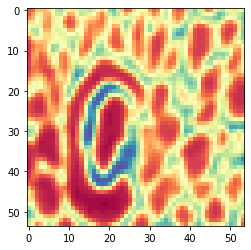

Epoch 4/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.5763 - acc: 0.9285 - val_loss: 1.7809 - val_acc: 0.9294

Epoch 00004: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.7808799006048788, 'val_acc': 0.9294365459269383, 'loss': 1.5763150284250396, 'acc': 0.9285397508784373, 'lr': 1e-04}


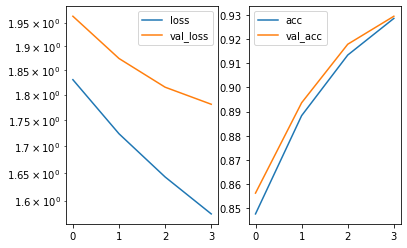

Predicted cell: MacroCheate Probability: [[0.9993654]]
True Cell type: MacroCheate
X [[0.48770863]]
True positional value X 0.6851851851851852
Y [[0.24334124]]
True positional value Y 0.3148148148148148
H [[0.23506722]]
True positional value H 0.37037037037037035
W [[0.33208793]]
True positional value W 0.48148148148148145


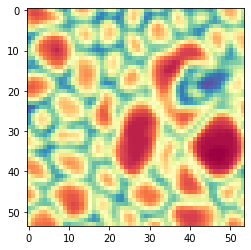

Epoch 5/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.5246 - acc: 0.9420 - val_loss: 1.7819 - val_acc: 0.9263

Epoch 00005: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.7818579690716279, 'val_acc': 0.9262769902424162, 'loss': 1.5245777288843567, 'acc': 0.9419558736289045, 'lr': 1e-04}


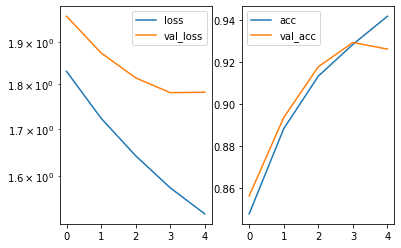

Predicted cell: MatureP1 Probability: [[0.9911266]]
True Cell type: MatureP1
X [[0.54697037]]
True positional value X 0.6851851851851852
Y [[0.5527841]]
True positional value Y 0.6851851851851852
H [[0.35882273]]
True positional value H 0.4074074074074074
W [[0.27943844]]
True positional value W 0.42592592592592593


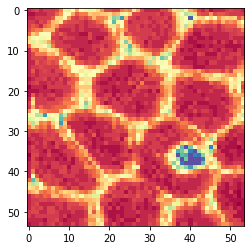

Epoch 6/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.4893 - acc: 0.9479 - val_loss: 1.7445 - val_acc: 0.9447

Epoch 00006: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.7445452377129504, 'val_acc': 0.9447077445258211, 'loss': 1.4892706119481522, 'acc': 0.9478877936343764, 'lr': 1e-04}


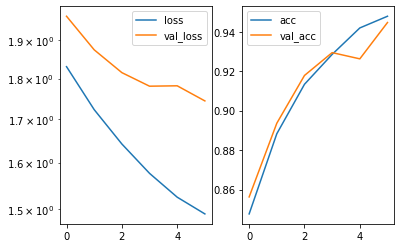

Predicted cell: MatureP1 Probability: [[0.99832994]]
True Cell type: MatureP1
X [[0.24553816]]
True positional value X 0.3148148148148148
Y [[0.529271]]
True positional value Y 0.6851851851851852
H [[0.2612914]]
True positional value H 0.3888888888888889
W [[0.24207778]]
True positional value W 0.2962962962962963


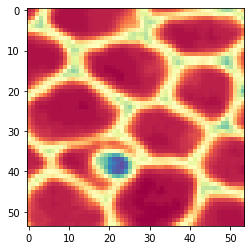

Epoch 7/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.4610 - acc: 0.9518 - val_loss: 1.7238 - val_acc: 0.9500

Epoch 00007: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.7238463346050437, 'val_acc': 0.9499736741506909, 'loss': 1.4610141986541756, 'acc': 0.9518239297099145, 'lr': 1e-04}


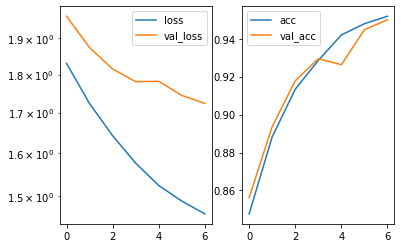

Predicted cell: MatureP1 Probability: [[0.99923337]]
True Cell type: MatureP1
X [[0.61708754]]
True positional value X 0.6851851851851852
Y [[0.5461442]]
True positional value Y 0.6851851851851852
H [[0.27209407]]
True positional value H 0.37037037037037035
W [[0.2558166]]
True positional value W 0.3888888888888889


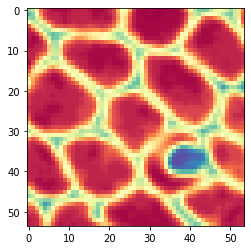

Epoch 8/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.4296 - acc: 0.9580 - val_loss: 1.7234 - val_acc: 0.9521

Epoch 00008: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.7233692704532697, 'val_acc': 0.952080035567472, 'loss': 1.4295964951472373, 'acc': 0.9580330446086579, 'lr': 1e-04}


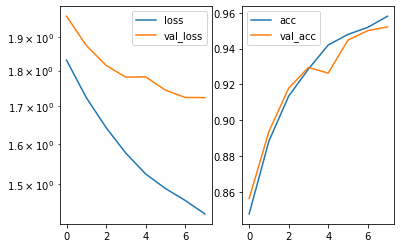

Predicted cell: Normal Probability: [[0.9944846]]
True Cell type: Normal
X [[0.3580391]]
True positional value X 0.5
Y [[0.36589903]]
True positional value Y 0.5
H [[0.1930762]]
True positional value H 0.3888888888888889
W [[0.25522867]]
True positional value W 0.3888888888888889


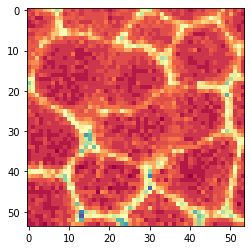

Epoch 9/250
36076/36076 [==============================] - 47s 1ms/step - loss: 1.4045 - acc: 0.9628 - val_loss: 1.7162 - val_acc: 0.9579

Epoch 00009: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModel/ORnetbin2d29V0.h5
{'val_loss': 1.7162484215585228, 'val_acc': 0.9578725733274909, 'loss': 1.404506217813476, 'acc': 0.9628284777171703, 'lr': 1e-04}


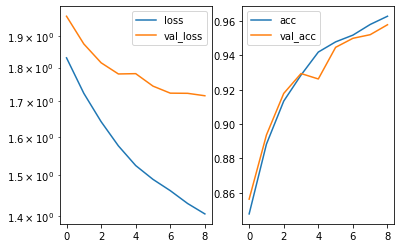

Predicted cell: MatureP1 Probability: [[0.99499065]]
True Cell type: MatureP1
X [[0.36486098]]
True positional value X 0.5
Y [[0.27980414]]
True positional value Y 0.3148148148148148
H [[0.25398216]]
True positional value H 0.3333333333333333
W [[0.24528071]]
True positional value W 0.3148148148148148


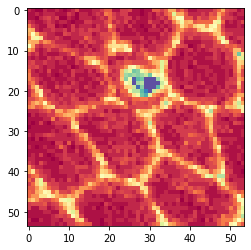

Epoch 10/250
12100/36076 [=========>....................] - ETA: 30s - loss: 1.3767 - acc: 0.9677

In [ ]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
